# Análisis Exploratorio de Datos: Viajes en Bicicleta

## Contexto
Este cuaderno presenta un análisis exploratorio de un conjunto de datos de viajes en bicicleta, donde cada registro corresponde a un viaje y la variable objetivo `target` clasifica el viaje en uno de cinco tipos (0–4).

## Objetivo
Entender patrones y diferencias entre tipos de viaje para: (1) evaluar la calidad de los datos, (2) identificar variables con mayor poder predictivo y (3) respaldar decisiones de modelado posteriores.

## Variables analizadas
- Variables temporales: `start_hour`, `start_dayofweek`, `is_weekend`
- Perfil de usuario: `sex`, `user_age`
- Características del viaje: `duration_minutes`, `trip_distance_km`
- Historial por usuario: `user_trip_number`, `tiempo_desde_ultimo_viaje`

## Enfoque
Comparación de distribuciones y proporciones por tipo de viaje, acompañadas de interpretaciones breves orientadas a negocio/modelado.


## Exploración inicial
Se cargan los datos, se revisan dimensiones, columnas y una muestra de registros para verificar consistencia.

In [11]:
from pathlib import Path
import pandas as pd

RUTAS = [
    Path('data/train_full_clean.csv'),
    Path('../data/train_full_clean.csv'),
    Path('train_full_clean.csv'),
]

df = None
for p in RUTAS:
    if p.exists():
        df = pd.read_csv(p)
        print(f"Cargando datos desde: {p}")
        break

if df is None:
    raise FileNotFoundError(
        "No se encontró 'train_full_clean.csv'. Colócalo en 'data/' o ajusta la ruta."
    )

print(df.shape)


Cargando datos desde: train_full_clean.csv
(657173, 29)


## Distribución de la variable objetivo (target)
Se analiza el balance de clases para identificar posibles sesgos y necesidades de estratificación o ponderación.

/tmp/ipython-input-2331507643.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='target', palette='pastel')


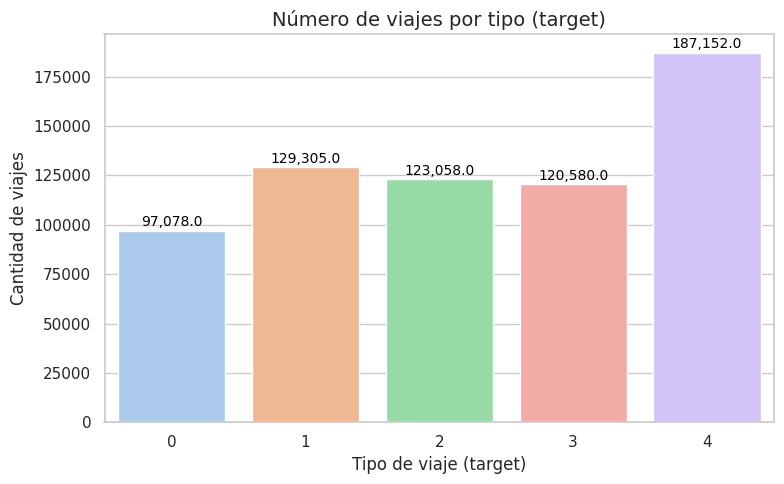

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")

# Conteo por tipo de viaje
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='target', palette='pastel')

# Etiquetas y título
plt.title('Número de viajes por tipo (target)', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Cantidad de viajes')

# Mostrar valores arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')

plt.tight_layout()
plt.show()


## Duración del viaje por tipo
Se comparan distribuciones de duración para identificar diferencias de comportamiento entre clases.

/tmp/ipython-input-1517207825.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='trip_duration_min', palette='pastel', showfliers=False)


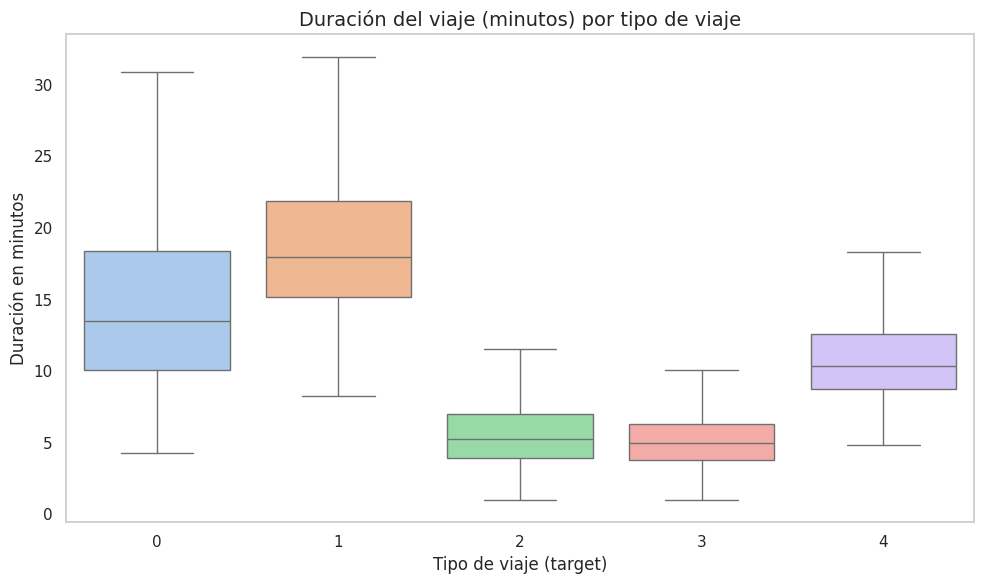

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='trip_duration_min', palette='pastel', showfliers=False)
plt.title('Duración del viaje (minutos) por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Duración en minutos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Hora de inicio por tipo
Se evalúan patrones horarios (picos, horas valle) asociados a cada tipo de viaje.

/tmp/ipython-input-3435956892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='start_hour', palette='pastel', showfliers=False)


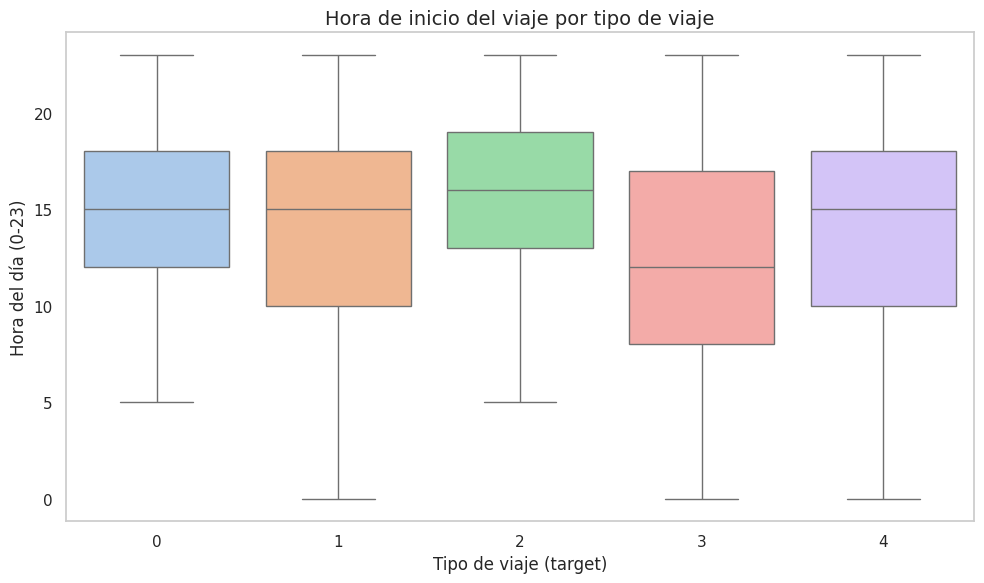

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='start_hour', palette='pastel', showfliers=False)
plt.title('Hora de inicio del viaje por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Hora del día (0-23)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-2539064739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='target', y='start_hour', palette='Set2', inner='quartile')


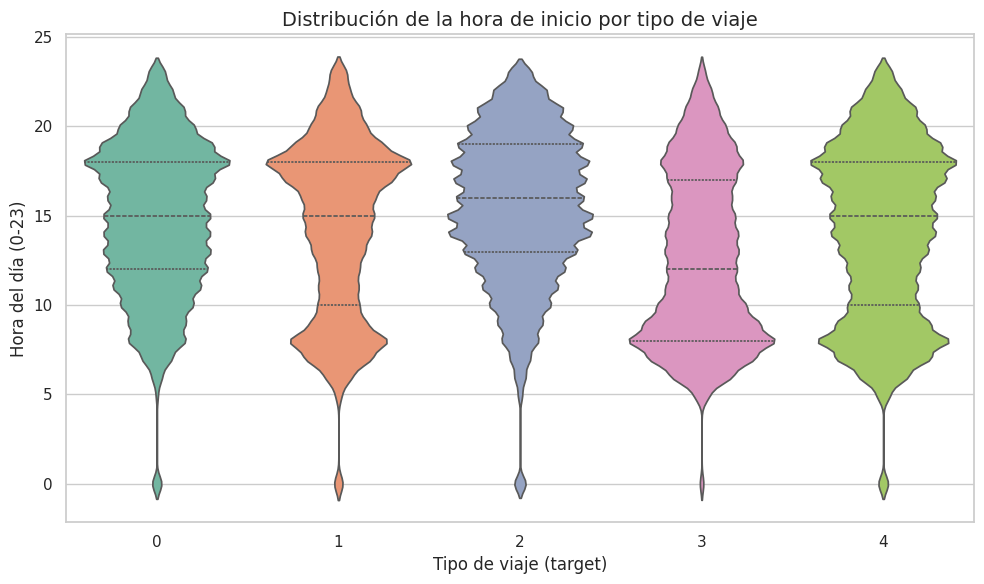

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='target', y='start_hour', palette='Set2', inner='quartile')
plt.title('Distribución de la hora de inicio por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Hora del día (0-23)')
plt.tight_layout()
plt.show()


## Día de la semana por tipo
Se revisan variaciones por día (laboral vs. fin de semana) para cada clase.

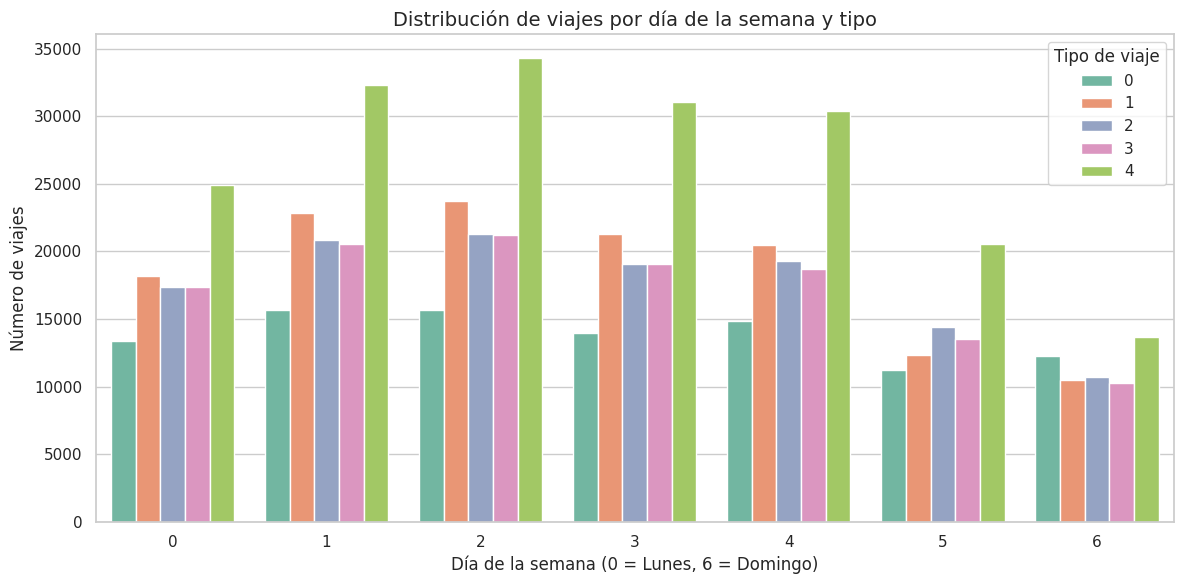

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='start_dayofweek', hue='target', palette='Set2')
plt.title('Distribución de viajes por día de la semana y tipo', fontsize=14)
plt.xlabel('Día de la semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Número de viajes')
plt.legend(title='Tipo de viaje')
plt.tight_layout()
plt.show()


## Indicador de fin de semana
Se compara la proporción de viajes en fin de semana por tipo para validar hipótesis de uso recreativo vs. conmutación.

/tmp/ipython-input-3295479332.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='target', y='is_weekend', ci=None, palette='pastel')
/tmp/ipython-input-3295479332.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='target', y='is_weekend', ci=None, palette='pastel')


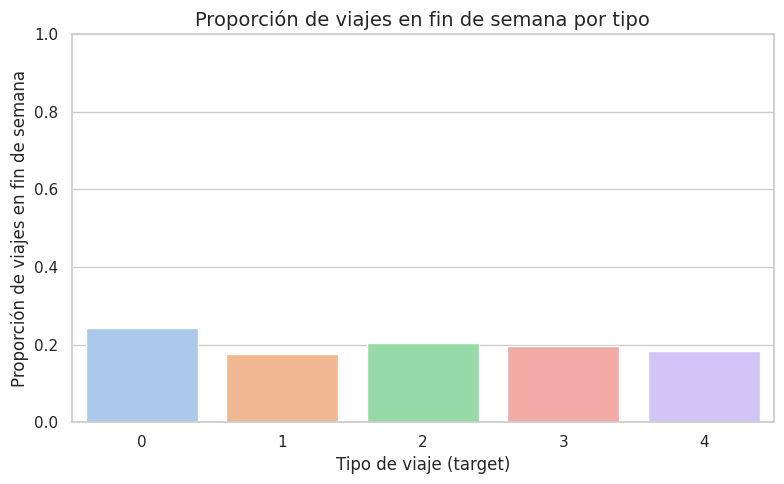

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='target', y='is_weekend', ci=None, palette='pastel')
plt.title('Proporción de viajes en fin de semana por tipo', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Proporción de viajes en fin de semana')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


## Sexo del usuario por tipo
Se exploran diferencias de distribución por sexo entre clases, verificando posibles sesgos o segmentos.

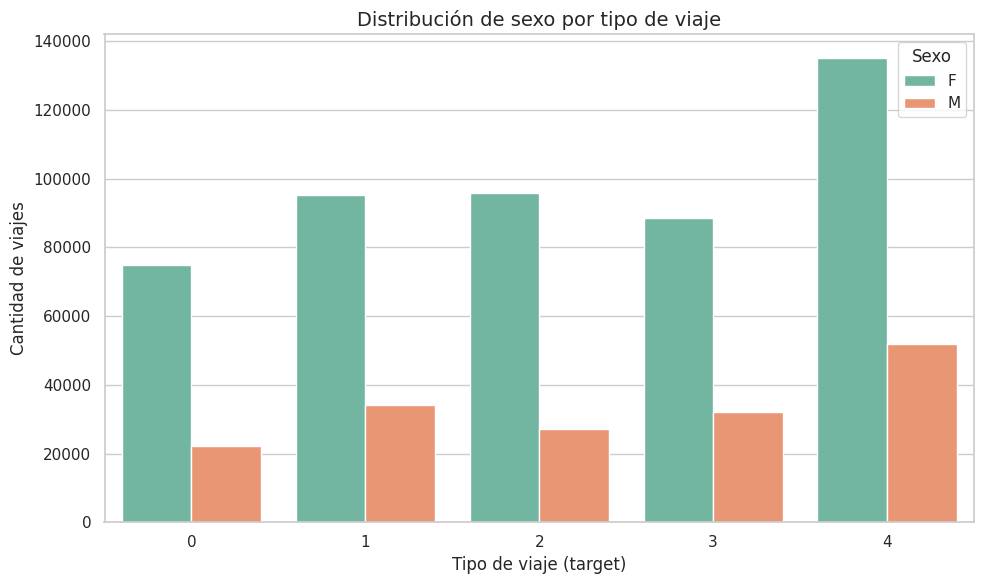

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='target', hue='sex', palette='Set2')
plt.title('Distribución de sexo por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Cantidad de viajes')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()


## Edad del usuario por tipo
Se comparan distribuciones de edad para identificar perfiles predominantes por tipo de viaje.

/tmp/ipython-input-3357120899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='user_age', palette='pastel', showfliers=False)


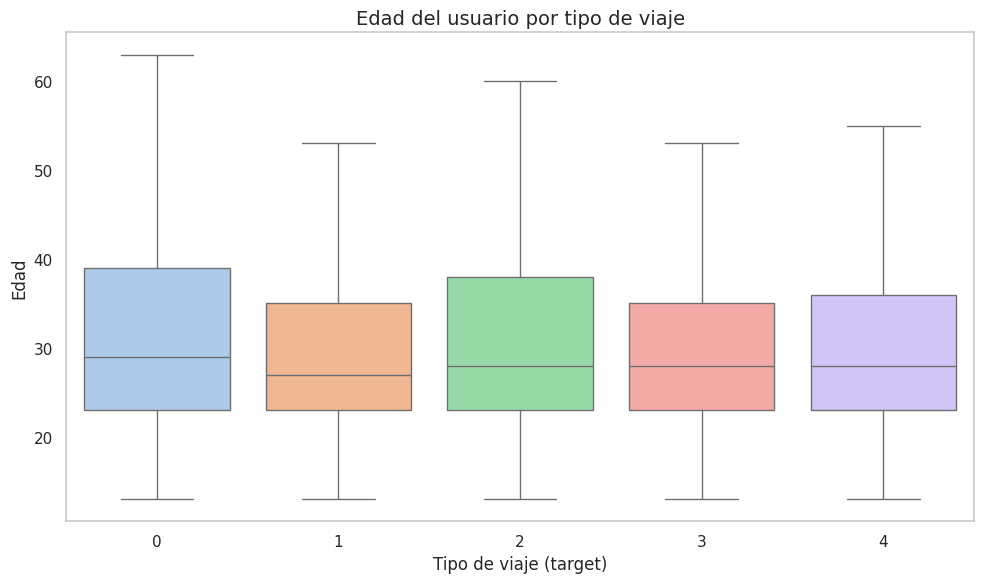

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='user_age', palette='pastel', showfliers=False)
plt.title('Edad del usuario por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Edad')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Distancia del viaje por tipo
Se analiza la distancia recorrida para detectar clases asociadas a trayectos cortos vs. largos.

/tmp/ipython-input-3159992431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='trip_distance_km', palette='pastel', showfliers=False)


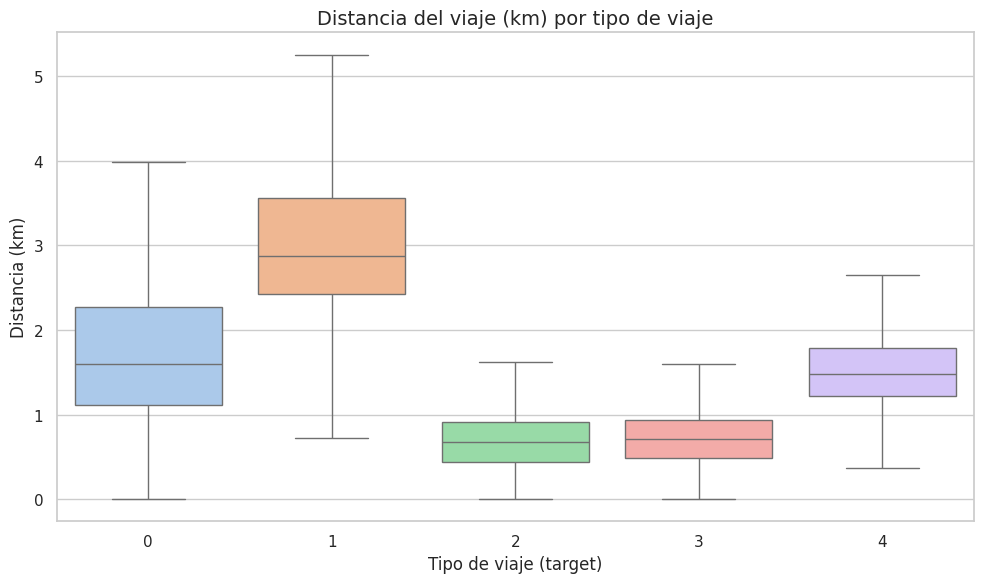

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='trip_distance_km', palette='pastel', showfliers=False)
plt.title('Distancia del viaje (km) por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Distancia (km)')
plt.tight_layout()
plt.show()


## Número de viaje por usuario
Se usa el conteo de viajes por usuario para capturar efectos de hábito/experiencia dentro del sistema.

In [21]:
# Asegúrate de convertir trip_start a datetime primero
df['trip_start'] = pd.to_datetime(df['trip_start'], errors='coerce')

# Ordenar por usuario y fecha de inicio
df = df.sort_values(by=['user_id', 'trip_start'])

# Asignar número secuencial de viaje por usuario
df['user_trip_number'] = df.groupby('user_id').cumcount() + 1


/tmp/ipython-input-1576486409.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trip_start'] = pd.to_datetime(df['trip_start'], errors='coerce')


/tmp/ipython-input-1559325501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='user_trip_number', palette='Set2', showfliers=False)


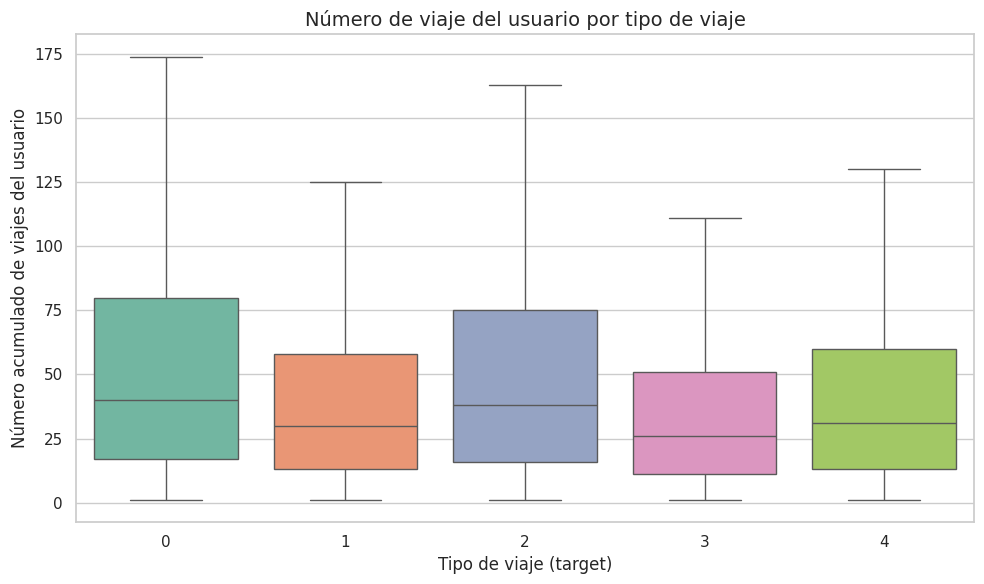

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='user_trip_number', palette='Set2', showfliers=False)
plt.title('Número de viaje del usuario por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Número acumulado de viajes del usuario')
plt.tight_layout()
plt.show()


## Tiempo desde el último viaje
Se analiza el tiempo transcurrido desde el viaje previo del usuario para capturar recurrencia y patrones de uso.

In [23]:
# Asegúrate de tener el trip_start como datetime
df['trip_start'] = pd.to_datetime(df['trip_start'], errors='coerce')

# Ordenar por usuario y fecha de inicio
df = df.sort_values(by=['user_id', 'trip_start'])

# Calcular diferencia entre este viaje y el anterior por usuario
df['tiempo_desde_ultimo_viaje'] = df.groupby('user_id')['trip_start'].diff().dt.total_seconds() / 60

# Llenar el primer viaje de cada usuario con -1 (o 0 si prefieres)
df['tiempo_desde_ultimo_viaje'] = df['tiempo_desde_ultimo_viaje'].fillna(-1)


In [24]:
df[['user_id', 'trip_start', 'tiempo_desde_ultimo_viaje']].head(10)


,user_id,trip_start,tiempo_desde_ultimo_viaje
109584,00026ead07e7387b64c2e7e57c74068b,2023-11-28 14:08:00,-1.0
117413,00026ead07e7387b64c2e7e57c74068b,2023-11-29 08:51:00,1123.0
120240,00026ead07e7387b64c2e7e57c74068b,2023-11-29 14:28:00,337.0
127304,00026ead07e7387b64c2e7e57c74068b,2023-11-30 08:37:00,1089.0
140073,00026ead07e7387b64c2e7e57c74068b,2023-12-01 12:44:00,1687.0
167981,00026ead07e7387b64c2e7e57c74068b,2023-12-05 14:09:00,5845.0
185991,00026ead07e7387b64c2e7e57c74068b,2023-12-07 14:09:00,2880.0
214828,00026ead07e7387b64c2e7e57c74068b,2023-12-11 08:15:00,5406.0
232336,00026ead07e7387b64c2e7e57c74068b,2023-12-12 14:23:00,1808.0
242222,00026ead07e7387b64c2e7e57c74068b,2023-12-13 14:05:00,1422.0


/tmp/ipython-input-4109363798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target', y='tiempo_desde_ultimo_viaje', palette='pastel', showfliers=False)


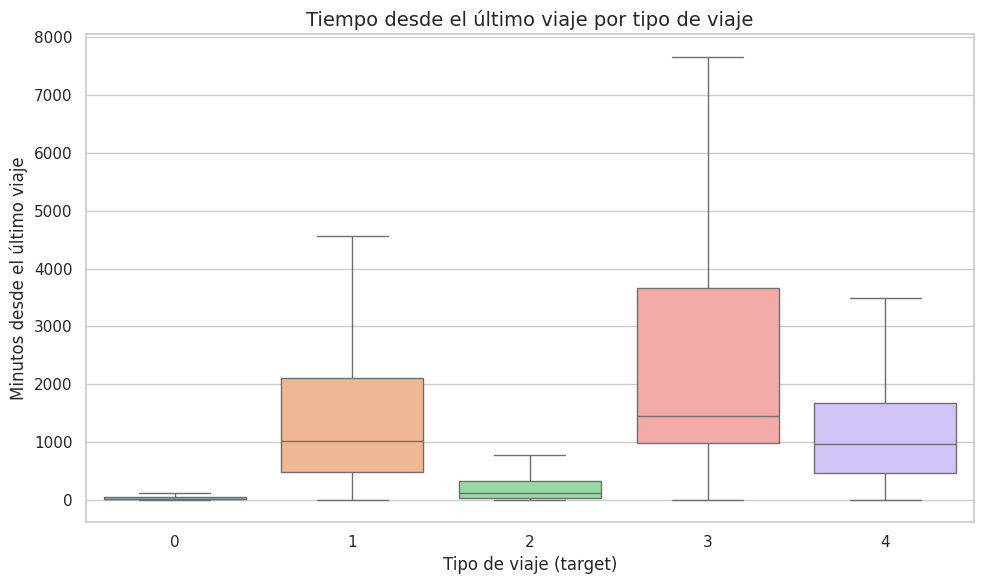

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='tiempo_desde_ultimo_viaje', palette='pastel', showfliers=False)
plt.title('Tiempo desde el último viaje por tipo de viaje', fontsize=14)
plt.xlabel('Tipo de viaje (target)')
plt.ylabel('Minutos desde el último viaje')
plt.tight_layout()
plt.show()


## Síntesis por tipo de viaje
A continuación se documentan hallazgos cualitativos por clase (0–4) a partir de los patrones observados.

### Tipo 1
Resumen de patrones observados para la clase 1.

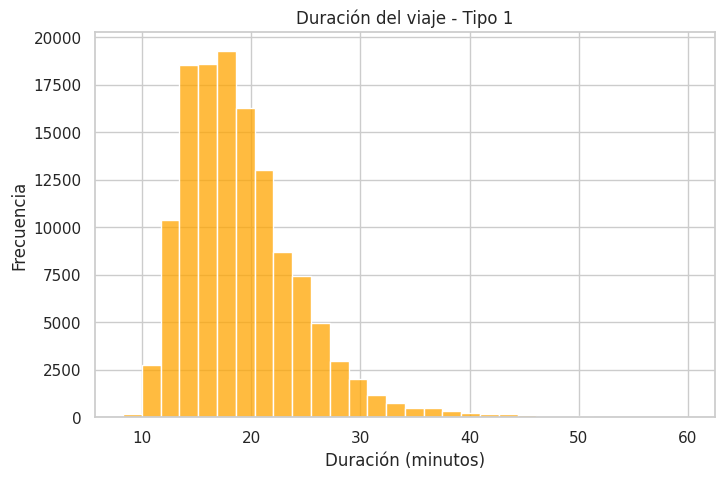

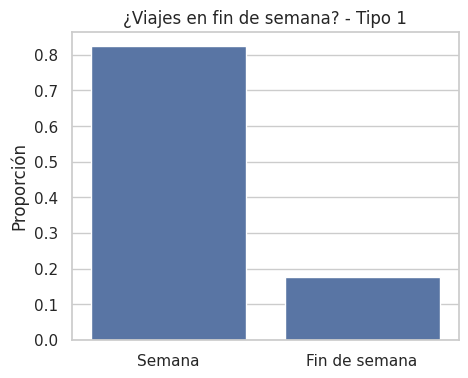

/tmp/ipython-input-21329599.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tipo1, x='sex', palette='Set2')


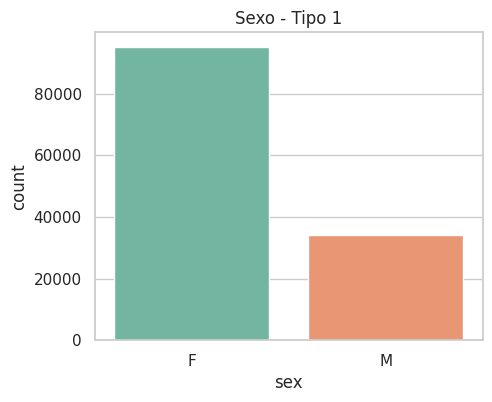

/tmp/ipython-input-21329599.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tipo1, x='sex', y='trip_duration_min', palette='pastel')


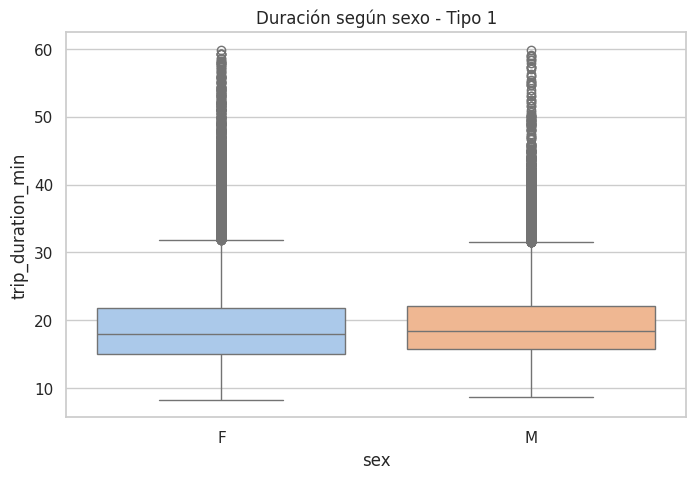

In [26]:
# Filtrar tipo 1
df_tipo1 = df[df['target'] == 1]

# Histograma duración
plt.figure(figsize=(8,5))
sns.histplot(df_tipo1['trip_duration_min'], bins=30, color='orange')
plt.title('Duración del viaje - Tipo 1')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Proporción de fines de semana
plt.figure(figsize=(5,4))
sns.barplot(x=['Semana', 'Fin de semana'], y=df_tipo1['is_weekend'].value_counts(normalize=True).sort_index().values)
plt.title('¿Viajes en fin de semana? - Tipo 1')
plt.ylabel('Proporción')
plt.show()

# Distribución de sexo
plt.figure(figsize=(5,4))
sns.countplot(data=df_tipo1, x='sex', palette='Set2')
plt.title('Sexo - Tipo 1')
plt.show()

# Boxplot edad vs duración
plt.figure(figsize=(8,5))
sns.boxplot(data=df_tipo1, x='sex', y='trip_duration_min', palette='pastel')
plt.title('Duración según sexo - Tipo 1')
plt.show()


### Tipo 0
Resumen de patrones observados para la clase 0.

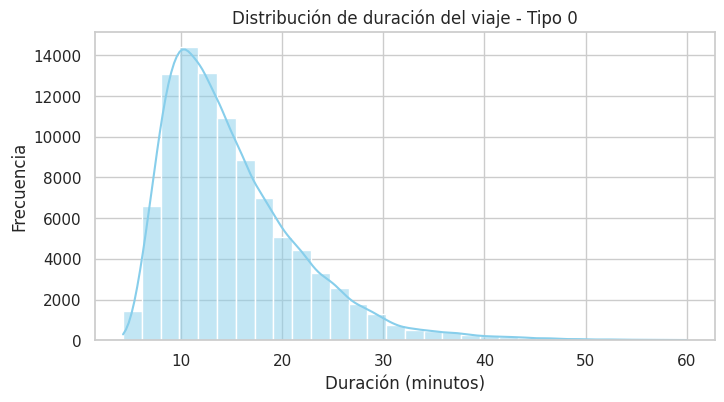

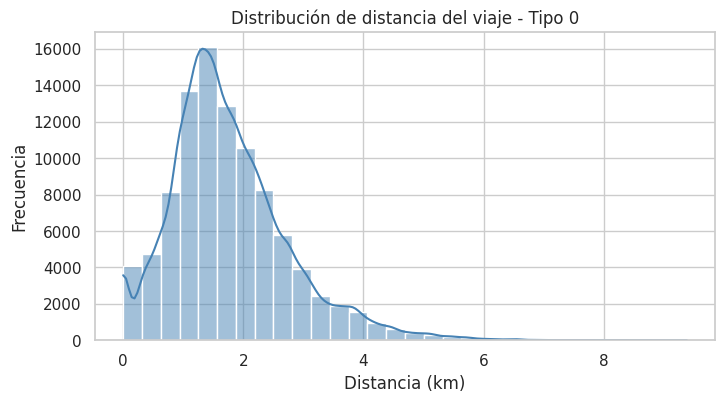

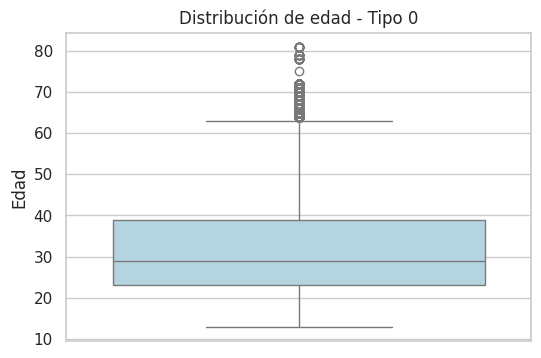

/tmp/ipython-input-875317351.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_0, x='sex', palette='pastel')


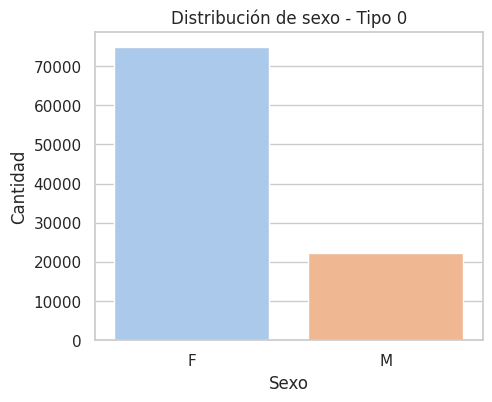

/tmp/ipython-input-875317351.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Entre semana', 'Fin de semana'], y=weekend_prop.values, palette='pastel')


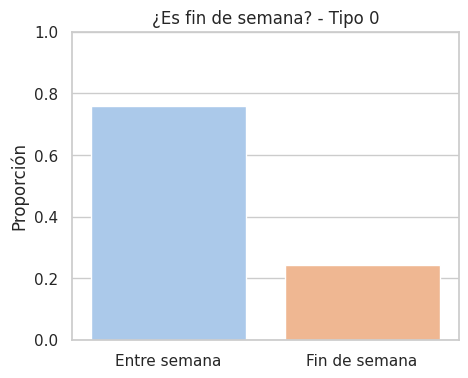

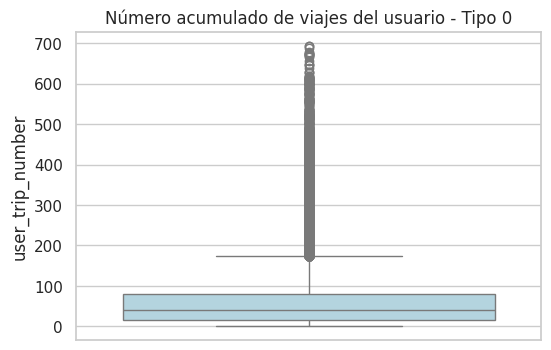

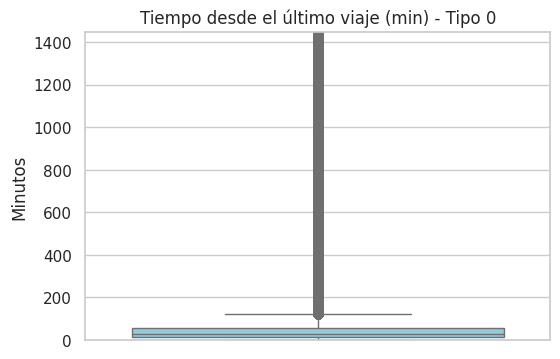

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrar tipo 0
df_0 = df[df['target'] == 0]

# 2. Histograma de duración
plt.figure(figsize=(8,4))
sns.histplot(df_0['trip_duration_min'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de duración del viaje - Tipo 0')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# 3. Histograma de distancia
plt.figure(figsize=(8,4))
sns.histplot(df_0['trip_distance_km'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de distancia del viaje - Tipo 0')
plt.xlabel('Distancia (km)')
plt.ylabel('Frecuencia')
plt.show()

# 4. Boxplot de edad
plt.figure(figsize=(6,4))
sns.boxplot(y=df_0['user_age'], color='lightblue')
plt.title('Distribución de edad - Tipo 0')
plt.ylabel('Edad')
plt.show()

# 5. Conteo por sexo
plt.figure(figsize=(5,4))
sns.countplot(data=df_0, x='sex', palette='pastel')
plt.title('Distribución de sexo - Tipo 0')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

# 6. Proporción en fin de semana
weekend_prop = df_0['is_weekend'].value_counts(normalize=True).sort_index()
plt.figure(figsize=(5,4))
sns.barplot(x=['Entre semana', 'Fin de semana'], y=weekend_prop.values, palette='pastel')
plt.title('¿Es fin de semana? - Tipo 0')
plt.ylabel('Proporción')
plt.ylim(0,1)
plt.show()

# 7. Boxplot número de viaje
plt.figure(figsize=(6,4))
sns.boxplot(y=df_0['user_trip_number'], color='lightblue')
plt.title('Número acumulado de viajes del usuario - Tipo 0')
plt.ylabel('user_trip_number')
plt.show()

# 8. Boxplot del tiempo desde el último viaje
plt.figure(figsize=(6,4))
sns.boxplot(y=df_0['tiempo_desde_ultimo_viaje'], color='skyblue')
plt.title('Tiempo desde el último viaje (min) - Tipo 0')
plt.ylabel('Minutos')
plt.ylim(0, df_0['tiempo_desde_ultimo_viaje'].quantile(0.95))  # cortar outliers extremos
plt.show()


### Tipo 2
Resumen de patrones observados para la clase 2.

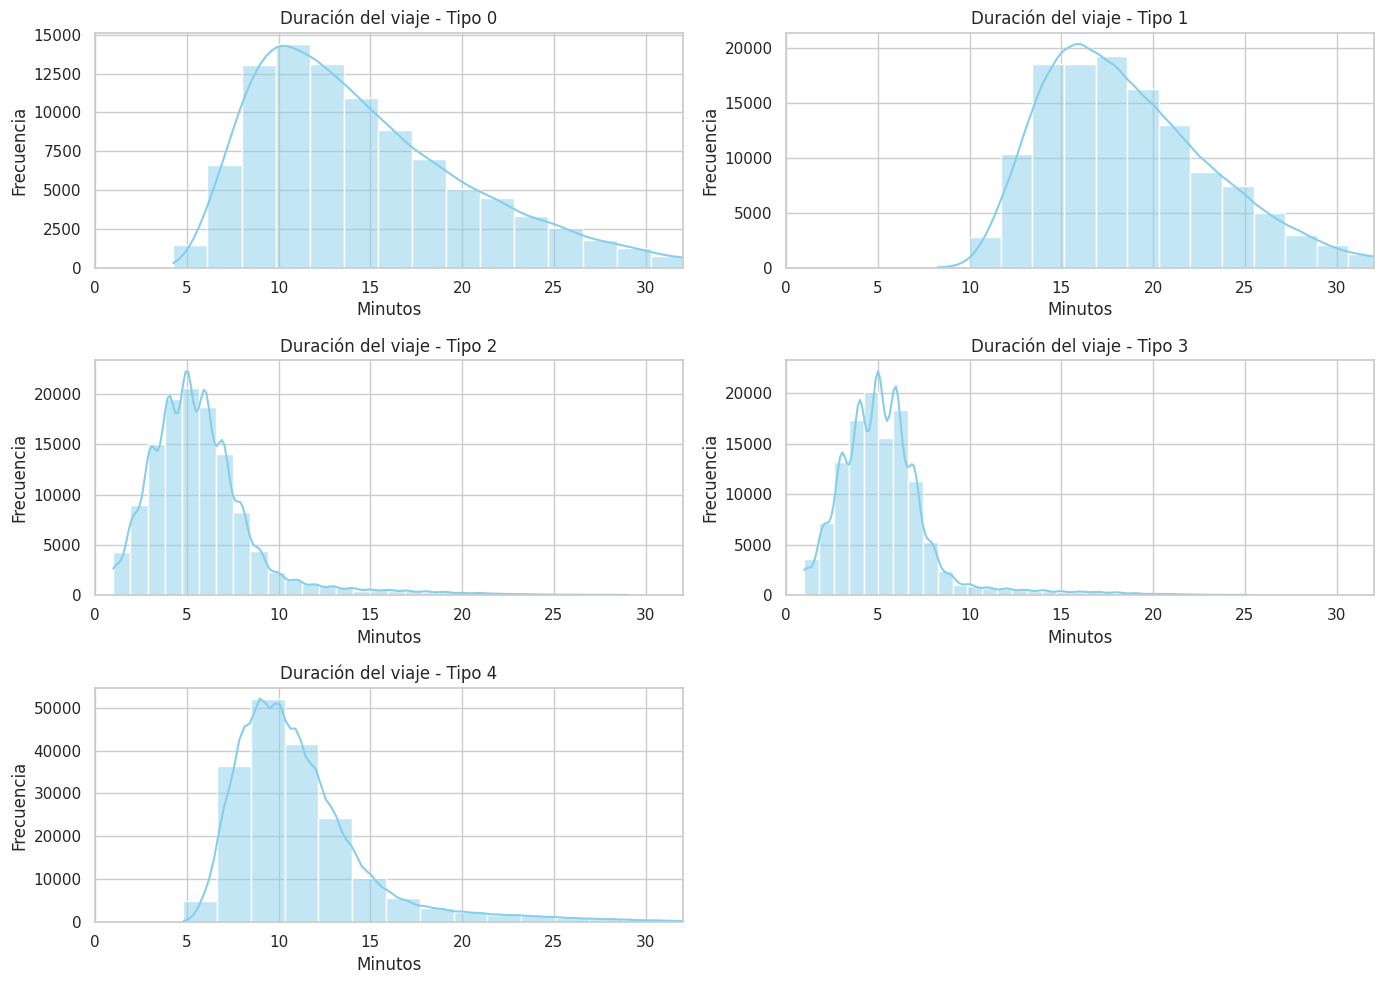

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes de estilo
sns.set(style='whitegrid')

# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

# Tipos de viaje
for i in range(5):
    df_i = df[df['target'] == i]
    sns.histplot(df_i['trip_duration_min'], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Duración del viaje - Tipo {i}')
    axes[i].set_xlabel('Minutos')
    axes[i].set_ylabel('Frecuencia')
    axes[i].set_xlim(0, df['trip_duration_min'].quantile(0.99))  # recorta outliers extremos

# Eliminar subplot vacío
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()


### Tipo 3
Resumen de patrones observados para la clase 3.

/tmp/ipython-input-4176867470.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_3, x='sex', palette='pastel', ax=axes[3])
/tmp/ipython-input-4176867470.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Entre semana', 'Fin de semana'], y=weekend_prop.values, palette='pastel', ax=axes[4])


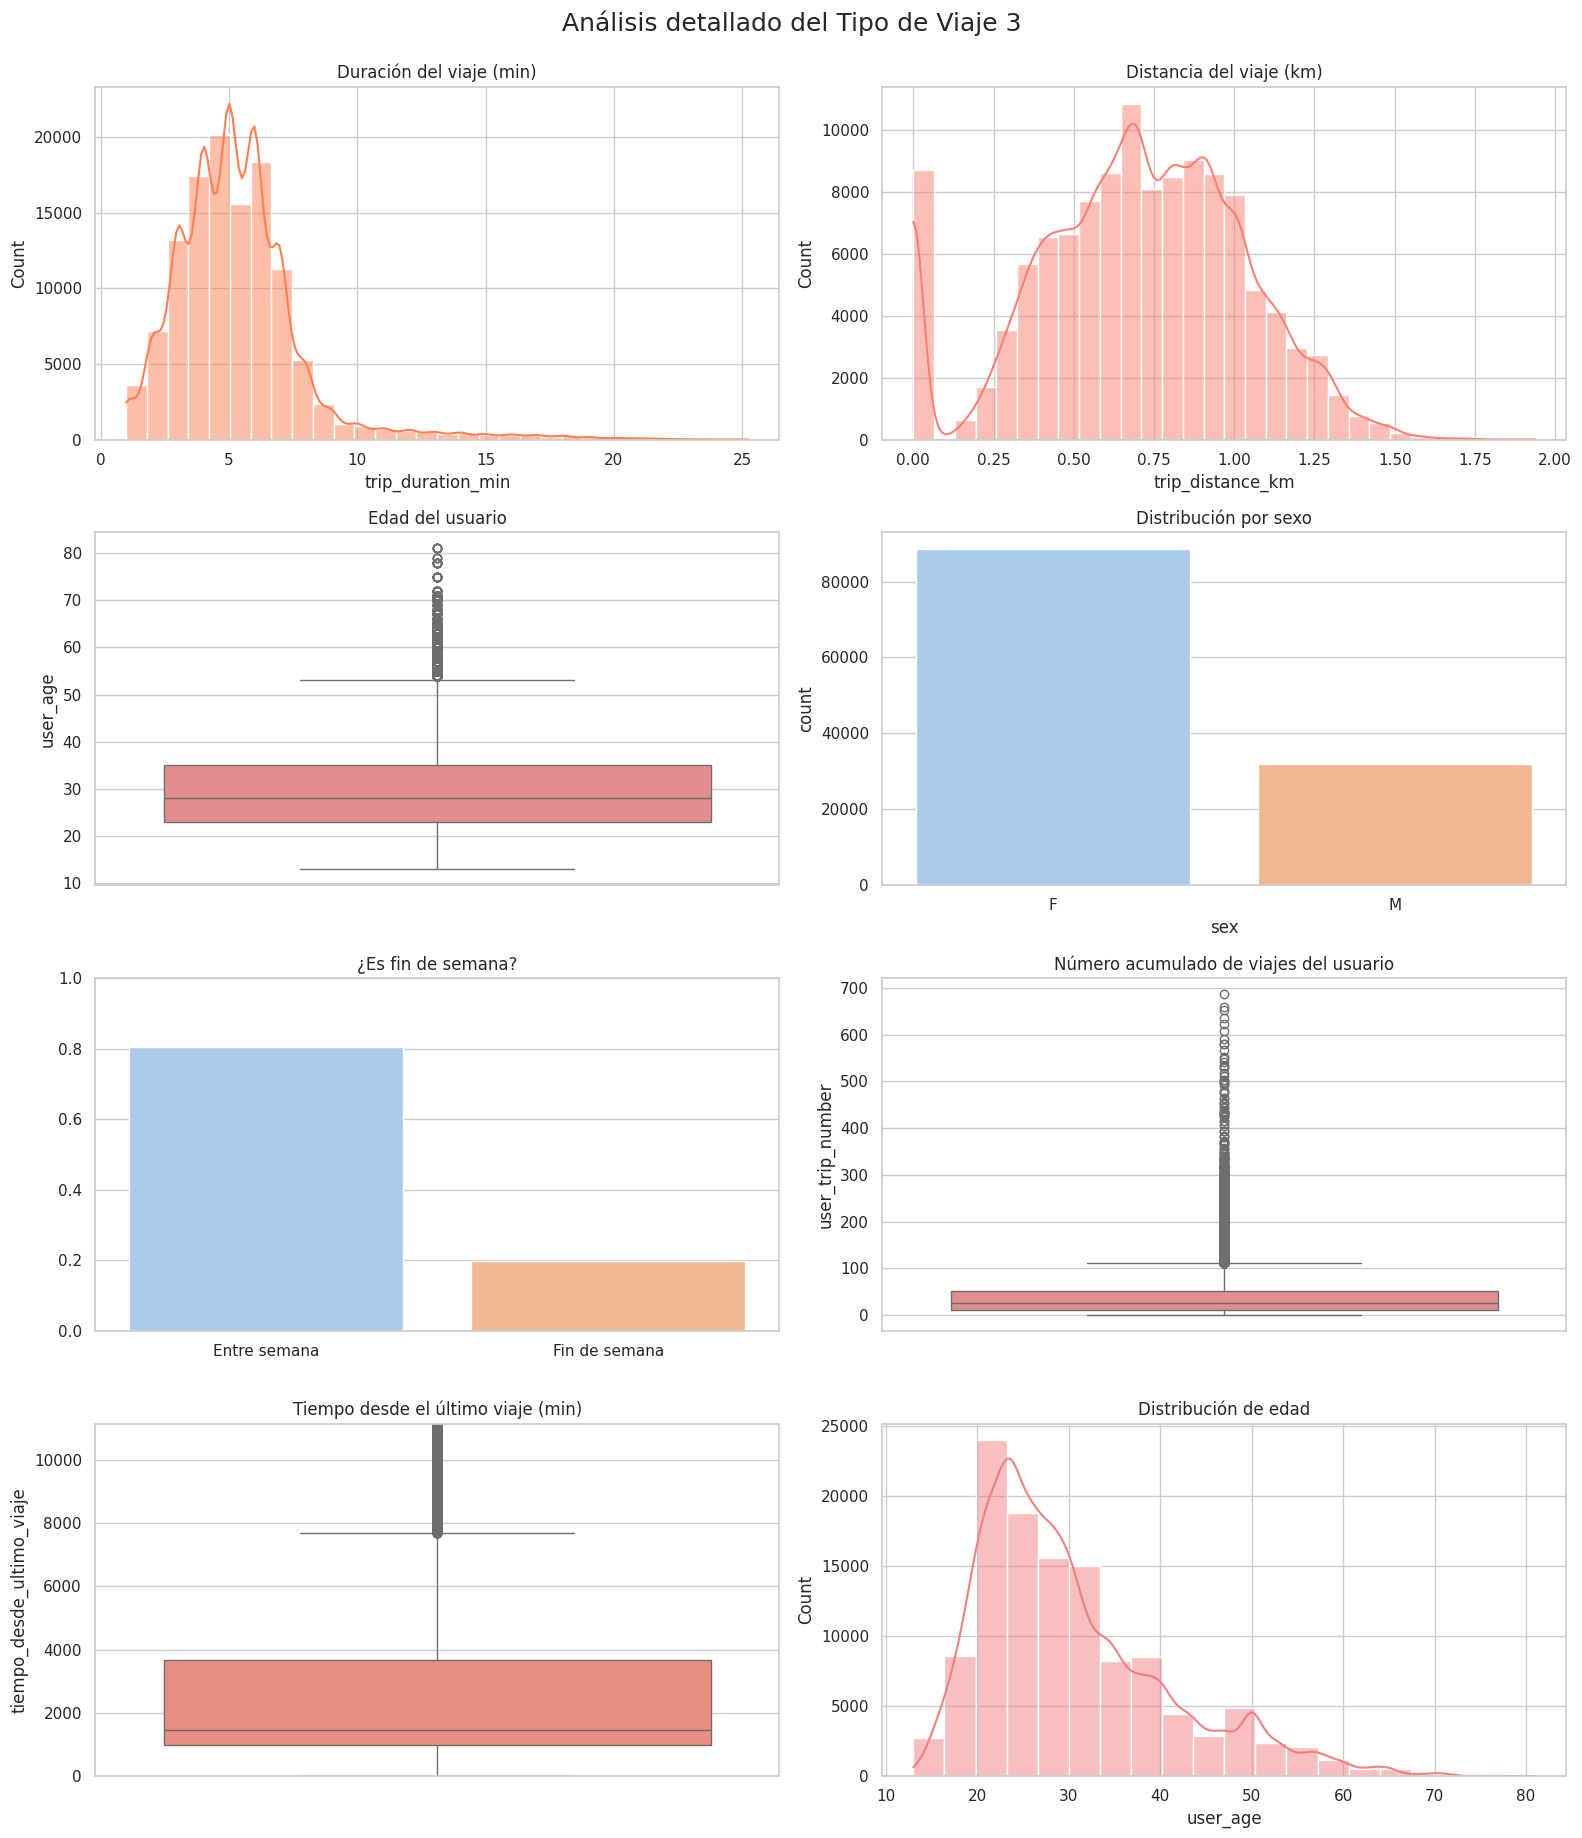

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Filtrar tipo 3
df_3 = df[df['target'] == 3]

#  Crear figura
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

#  1. Duración
sns.histplot(df_3['trip_duration_min'], bins=30, kde=True, color='coral', ax=axes[0])
axes[0].set_title('Duración del viaje (min)')

#  2. Distancia
sns.histplot(df_3['trip_distance_km'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Distancia del viaje (km)')

#  3. Edad
sns.boxplot(y=df_3['user_age'], color='lightcoral', ax=axes[2])
axes[2].set_title('Edad del usuario')

#  4. Sexo
sns.countplot(data=df_3, x='sex', palette='pastel', ax=axes[3])
axes[3].set_title('Distribución por sexo')

#  5. ¿Fin de semana?
weekend_prop = df_3['is_weekend'].value_counts(normalize=True).sort_index()
sns.barplot(x=['Entre semana', 'Fin de semana'], y=weekend_prop.values, palette='pastel', ax=axes[4])
axes[4].set_title('¿Es fin de semana?')
axes[4].set_ylim(0,1)

#  6. Número de viaje del usuario
sns.boxplot(y=df_3['user_trip_number'], color='lightcoral', ax=axes[5])
axes[5].set_title('Número acumulado de viajes del usuario')

#  7. Tiempo desde último viaje
sns.boxplot(y=df_3['tiempo_desde_ultimo_viaje'], color='salmon', ax=axes[6])
axes[6].set_title('Tiempo desde el último viaje (min)')
axes[6].set_ylim(0, df_3['tiempo_desde_ultimo_viaje'].quantile(0.95))  # recorta outliers

#  8. Histograma de edad
sns.histplot(df_3['user_age'], bins=20, kde=True, color='lightcoral', ax=axes[7])
axes[7].set_title('Distribución de edad')

# Ajustar diseño
plt.tight_layout()
plt.suptitle('Análisis detallado del Tipo de Viaje 3', fontsize=18, y=1.02)
plt.show()


### Tipo 4
Resumen de patrones observados para la clase 4.

/tmp/ipython-input-2207495622.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_4, x='sex', palette='pastel', ax=axes[3])
/tmp/ipython-input-2207495622.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Entre semana', 'Fin de semana'], y=weekend_prop.values, palette='pastel', ax=axes[4])


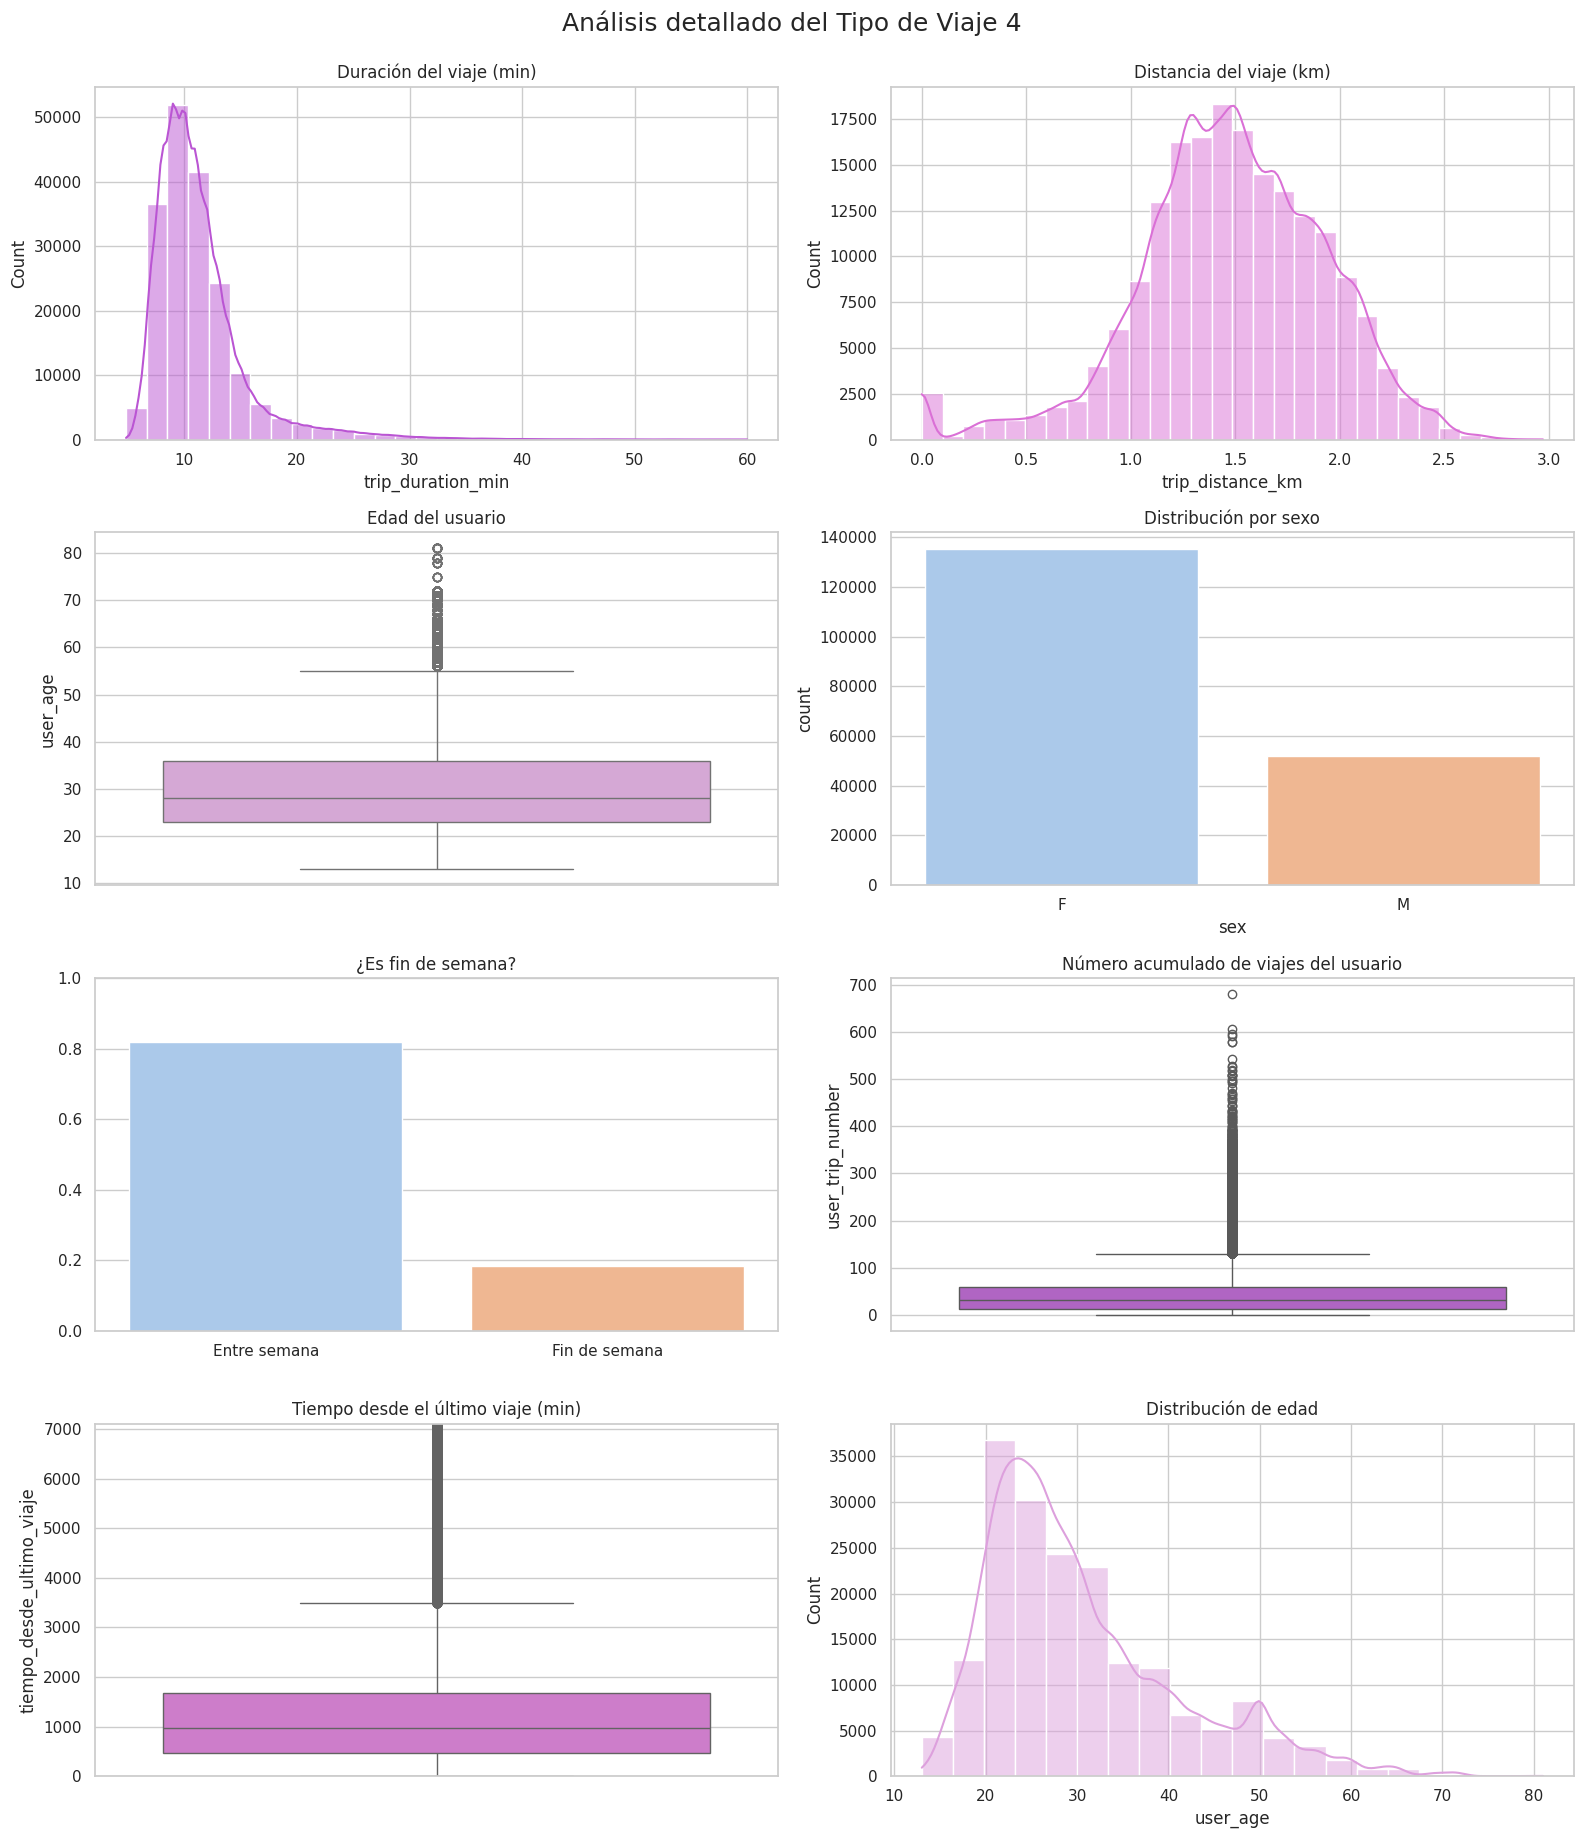

In [30]:
#  Filtrar tipo 4
df_4 = df[df['target'] == 4]

#  Crear figura
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

#  1. Duración
sns.histplot(df_4['trip_duration_min'], bins=30, kde=True, color='mediumorchid', ax=axes[0])
axes[0].set_title('Duración del viaje (min)')

#  2. Distancia
sns.histplot(df_4['trip_distance_km'], bins=30, kde=True, color='orchid', ax=axes[1])
axes[1].set_title('Distancia del viaje (km)')

#  3. Edad
sns.boxplot(y=df_4['user_age'], color='plum', ax=axes[2])
axes[2].set_title('Edad del usuario')

#  4. Sexo
sns.countplot(data=df_4, x='sex', palette='pastel', ax=axes[3])
axes[3].set_title('Distribución por sexo')

#  5. ¿Fin de semana?
weekend_prop = df_4['is_weekend'].value_counts(normalize=True).sort_index()
sns.barplot(x=['Entre semana', 'Fin de semana'], y=weekend_prop.values, palette='pastel', ax=axes[4])
axes[4].set_title('¿Es fin de semana?')
axes[4].set_ylim(0,1)

#  6. Número de viaje del usuario
sns.boxplot(y=df_4['user_trip_number'], color='mediumorchid', ax=axes[5])
axes[5].set_title('Número acumulado de viajes del usuario')

#  7. Tiempo desde último viaje
sns.boxplot(y=df_4['tiempo_desde_ultimo_viaje'], color='orchid', ax=axes[6])
axes[6].set_title('Tiempo desde el último viaje (min)')
axes[6].set_ylim(0, df_4['tiempo_desde_ultimo_viaje'].quantile(0.95))  # recorta outliers

#  8. Histograma de edad
sns.histplot(df_4['user_age'], bins=20, kde=True, color='plum', ax=axes[7])
axes[7].set_title('Distribución de edad')

# Ajustar diseño
plt.tight_layout()
plt.suptitle('Análisis detallado del Tipo de Viaje 4', fontsize=18, y=1.02)
plt.show()
